### Importing Vyper

In [1]:
import os 
import shutil
#from vyper.user import Model
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
%%time
df = pd.read_csv("C:/Users/RobertBruffey/OneDrive - Blend 360/Documents/The Plan/NFL/DFS Weekly Update Process/def_team_data.csv")
df = df.fillna(0)
#df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
#                      + df['Receiving Rec']*1 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
df['FantasyPoints'] = df['FPts']
df = df[df['FantasyPoints'] <= 30]

C:\Users\RobertBruffey\anaconda3\lib\site-packages\decorator.py:231: DtypeWarning: Columns (165,167,168,179,181,182,193,195,196,207,209,210,221,223,224,235,237,238,249,251,252,263,265,266,277,279,280,291,293,294,305,307,308,319,321,322,333,335,336,347,349,350,361,363,364,375,377,378,389,391,392,403,405,406,417,419,420,431,433,434,445,447,448,459,461,462,473,475,476,487,489,490,501,503,504,515,517,518,529,531,532,680,692,693,694,706,707,708,720,721,722,734,735,736,748,749,750,762,763,764,776,777,778,790,791,792,804,805,806,818,819,820,832,833,834,846,847,848,860,861,862,874,875,876,888,889,890,902,903,904,916,917,918,930,931,932,944,945,946,958,959,960,972,973,974,986,987,988,1000,1001,1002,1014,1015,1016,1028,1029,1030,1042,1043,1044,1056,1057) have mixed types.Specify dtype option on import or set low_memory=False.
  return caller(func, *(extras + args), **kw)


Wall time: 5.55 s


In [3]:
df = df[~df['team_wk_year'].str.contains('12 2022')]

In [4]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [5]:
df = df.reset_index()


C:\Users\RobertBruffey\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FantasyPoints', ylabel='Density'>

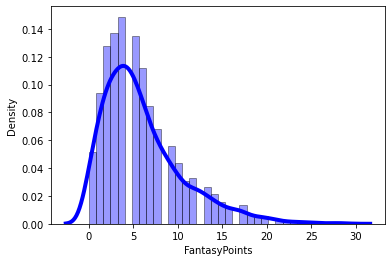

In [6]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [7]:

df = df.drop(columns = ['index',
    'Unnamed: 0',
                       'Opp', 'FPts',
#'team_wk_year',
'opp_wk_year',
'team_wk_year 1 wks ago',
'team_wk_year 2 wks ago',
'team_wk_year 3 wks ago',
'team_wk_year 4 wks ago',
'team_wk_year 5 wks ago',
'team_wk_year 6 wks ago',
'team_wk_year 7 wks ago',
'team_wk_year 8 wks ago',
'team_wk_year 9 wks ago',
'team_wk_year 10 wks ago',
'team_wk_year 11 wks ago',
'team_wk_year 12 wks ago',
'team_wk_year 13 wks ago',
'team_wk_year 14 wks ago',
'team_wk_year 15 wks ago',
'team_wk_year 16 wks ago',
'team_wk_year 17 wks ago',
'team_wk_year 18 wks ago',
'team_wk_year 19 wks ago',
'team_wk_year 20 wks ago',
'team_wk_year 21 wks ago',
'team_wk_year 22 wks ago',
'team_wk_year 23 wks ago',
'team_wk_year 24 wks ago',
'team_wk_year 25 wks ago',
'team_wk_year 26 wks ago',
'team_wk_year 27 wks ago',
'team_wk_year 28 wks ago',
'team_wk_year 29 wks ago',
'team_wk_year 30 wks ago',
'team_wk_year 31 wks ago',
'team_wk_year 32 wks ago',
'team_wk_year 33 wks ago',
'team_wk_year 34 wks ago',
'team_wk_year 35 wks ago',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup opp_wk_year 1wks ago',
'def matchup Opp 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup opp_wk_year 2wks ago',
'def matchup Opp 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup opp_wk_year 3wks ago',
'def matchup Opp 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup opp_wk_year 4wks ago',
'def matchup Opp 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup opp_wk_year 5wks ago',
'def matchup Opp 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup opp_wk_year 6wks ago',
'def matchup Opp 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup opp_wk_year 7wks ago',
'def matchup Opp 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup opp_wk_year 8wks ago',
'def matchup Opp 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup opp_wk_year 9wks ago',
'def matchup Opp 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup opp_wk_year 10wks ago',
'def matchup Opp 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup opp_wk_year 11wks ago',
'def matchup Opp 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup opp_wk_year 12wks ago',
'def matchup Opp 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup opp_wk_year 13wks ago',
'def matchup Opp 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup opp_wk_year 14wks ago',
'def matchup Opp 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup opp_wk_year 15wks ago',
'def matchup Opp 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup opp_wk_year 16wks ago',
'def matchup Opp 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup opp_wk_year 17wks ago',
'def matchup Opp 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup opp_wk_year 18wks ago',
'def matchup Opp 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup opp_wk_year 19wks ago',
'def matchup Opp 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup opp_wk_year 20wks ago',
'def matchup Opp 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup opp_wk_year 21wks ago',
'def matchup Opp 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup opp_wk_year 22wks ago',
'def matchup Opp 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup opp_wk_year 23wks ago',
'def matchup Opp 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup opp_wk_year 24wks ago',
'def matchup Opp 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup opp_wk_year 25wks ago',
'def matchup Opp 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup opp_wk_year 26wks ago',
'def matchup Opp 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup opp_wk_year 27wks ago',
'def matchup Opp 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup opp_wk_year 28wks ago',
'def matchup Opp 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup opp_wk_year 29wks ago',
'def matchup Opp 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup opp_wk_year 30wks ago',
'def matchup Opp 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup opp_wk_year 31wks ago',
'def matchup Opp 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup opp_wk_year 32wks ago',
'def matchup Opp 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup opp_wk_year 33wks ago',
'def matchup Opp 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup opp_wk_year 34wks ago',
'def matchup Opp 35wks ago',
'def matchup team_wk_year 35wks ago',
'def matchup opp_wk_year 35wks ago',
'opp_wk_year 1 wks ago',
'opp_wk_year 2 wks ago',
'opp_wk_year 3 wks ago',
'opp_wk_year 4 wks ago',
'opp_wk_year 5 wks ago',
'opp_wk_year 6 wks ago',
'opp_wk_year 7 wks ago',
'opp_wk_year 8 wks ago',
'opp_wk_year 9 wks ago',
'opp_wk_year 10 wks ago',
'opp_wk_year 11 wks ago',
'opp_wk_year 12 wks ago',
'opp_wk_year 13 wks ago',
'opp_wk_year 14 wks ago',
'opp_wk_year 15 wks ago',
'opp_wk_year 16 wks ago',
'opp_wk_year 17 wks ago',
'opp_wk_year 18 wks ago',
'opp_wk_year 19 wks ago',
'opp_wk_year 20 wks ago',
'opp_wk_year 21 wks ago',
'opp_wk_year 22 wks ago',
'opp_wk_year 23 wks ago',
'opp_wk_year 24 wks ago',
'opp_wk_year 25 wks ago',
'opp_wk_year 26 wks ago',
'opp_wk_year 27 wks ago',
'opp_wk_year 28 wks ago',
'opp_wk_year 29 wks ago',
'opp_wk_year 30 wks ago',
'opp_wk_year 31 wks ago',
'opp_wk_year 32 wks ago',
'opp_wk_year 33 wks ago',
'opp_wk_year 34 wks ago',
'opp_wk_year 35 wks ago',
'opp matchup CITY 1wks ago',
'opp matchup team_wk_year 1wks ago',
'opp matchup opp_wk_year 1wks ago',
'opp matchup CITY 2wks ago',
'opp matchup team_wk_year 2wks ago',
'opp matchup opp_wk_year 2wks ago',
'opp matchup CITY 3wks ago',
'opp matchup team_wk_year 3wks ago',
'opp matchup opp_wk_year 3wks ago',
'opp matchup CITY 4wks ago',
'opp matchup team_wk_year 4wks ago',
'opp matchup opp_wk_year 4wks ago',
'opp matchup CITY 5wks ago',
'opp matchup team_wk_year 5wks ago',
'opp matchup opp_wk_year 5wks ago',
'opp matchup CITY 6wks ago',
'opp matchup team_wk_year 6wks ago',
'opp matchup opp_wk_year 6wks ago',
'opp matchup CITY 7wks ago',
'opp matchup team_wk_year 7wks ago',
'opp matchup opp_wk_year 7wks ago',
'opp matchup CITY 8wks ago',
'opp matchup team_wk_year 8wks ago',
'opp matchup opp_wk_year 8wks ago',
'opp matchup CITY 9wks ago',
'opp matchup team_wk_year 9wks ago',
'opp matchup opp_wk_year 9wks ago',
'opp matchup CITY 10wks ago',
'opp matchup team_wk_year 10wks ago',
'opp matchup opp_wk_year 10wks ago',
'opp matchup CITY 11wks ago',
'opp matchup team_wk_year 11wks ago',
'opp matchup opp_wk_year 11wks ago',
'opp matchup CITY 12wks ago',
'opp matchup team_wk_year 12wks ago',
'opp matchup opp_wk_year 12wks ago',
'opp matchup CITY 13wks ago',
'opp matchup team_wk_year 13wks ago',
'opp matchup opp_wk_year 13wks ago',
'opp matchup CITY 14wks ago',
'opp matchup team_wk_year 14wks ago',
'opp matchup opp_wk_year 14wks ago',
'opp matchup CITY 15wks ago',
'opp matchup team_wk_year 15wks ago',
'opp matchup opp_wk_year 15wks ago',
'opp matchup CITY 16wks ago',
'opp matchup team_wk_year 16wks ago',
'opp matchup opp_wk_year 16wks ago',
'opp matchup CITY 17wks ago',
'opp matchup team_wk_year 17wks ago',
'opp matchup opp_wk_year 17wks ago',
'opp matchup CITY 18wks ago',
'opp matchup team_wk_year 18wks ago',
'opp matchup opp_wk_year 18wks ago',
'opp matchup CITY 19wks ago',
'opp matchup team_wk_year 19wks ago',
'opp matchup opp_wk_year 19wks ago',
'opp matchup CITY 20wks ago',
'opp matchup team_wk_year 20wks ago',
'opp matchup opp_wk_year 20wks ago',
'opp matchup CITY 21wks ago',
'opp matchup team_wk_year 21wks ago',
'opp matchup opp_wk_year 21wks ago',
'opp matchup CITY 22wks ago',
'opp matchup team_wk_year 22wks ago',
'opp matchup opp_wk_year 22wks ago',
'opp matchup CITY 23wks ago',
'opp matchup team_wk_year 23wks ago',
'opp matchup opp_wk_year 23wks ago',
'opp matchup CITY 24wks ago',
'opp matchup team_wk_year 24wks ago',
'opp matchup opp_wk_year 24wks ago',
'opp matchup CITY 25wks ago',
'opp matchup team_wk_year 25wks ago',
'opp matchup opp_wk_year 25wks ago',
'opp matchup CITY 26wks ago',
'opp matchup team_wk_year 26wks ago',
'opp matchup opp_wk_year 26wks ago',
'opp matchup CITY 27wks ago',
'opp matchup team_wk_year 27wks ago',
'opp matchup opp_wk_year 27wks ago',
'opp matchup CITY 28wks ago',
'opp matchup team_wk_year 28wks ago',
'opp matchup opp_wk_year 28wks ago',
'opp matchup CITY 29wks ago',
'opp matchup team_wk_year 29wks ago',
'opp matchup opp_wk_year 29wks ago',
'opp matchup CITY 30wks ago',
'opp matchup team_wk_year 30wks ago',
'opp matchup opp_wk_year 30wks ago',
'opp matchup CITY 31wks ago',
'opp matchup team_wk_year 31wks ago',
'opp matchup opp_wk_year 31wks ago',
'opp matchup CITY 32wks ago',
'opp matchup opp_wk_year 32wks ago',
'opp matchup CITY 33wks ago',
'opp matchup team_wk_year 33wks ago',
'opp matchup opp_wk_year 33wks ago',
'opp matchup CITY 34wks ago',
'opp matchup team_wk_year 34wks ago',
'opp matchup opp_wk_year 34wks ago',
'opp matchup CITY 35wks ago',
'opp matchup team_wk_year 35wks ago',
'opp matchup opp_wk_year 35wks ago',
                        'opp matchup team_wk_year 32wks ago',
'sum def matchup Opp 2wk trend',
'avg def matchup Opp 2wk trend',
'min def matchup Opp 2wk trend',
'max def matchup Opp 2wk trend',
'sum def matchup Opp 3wk trend',
'avg def matchup Opp 3wk trend',
'min def matchup Opp 3wk trend',
'max def matchup Opp 3wk trend',
'sum def matchup Opp 4wk trend',
'avg def matchup Opp 4wk trend',
'min def matchup Opp 4wk trend',
'max def matchup Opp 4wk trend',
'sum def matchup Opp 5wk trend',
'avg def matchup Opp 5wk trend',
'min def matchup Opp 5wk trend',
'max def matchup Opp 5wk trend',
'sum def matchup Opp 6wk trend',
'avg def matchup Opp 6wk trend',
'min def matchup Opp 6wk trend',
'max def matchup Opp 6wk trend',
'sum def matchup Opp 9wk trend',
'avg def matchup Opp 9wk trend',
'min def matchup Opp 9wk trend',
'max def matchup Opp 9wk trend',
'sum def matchup Opp 12wk trend',
'avg def matchup Opp 12wk trend',
'min def matchup Opp 12wk trend',
'max def matchup Opp 12wk trend',
'sum def matchup Opp 15wk trend',
'avg def matchup Opp 15wk trend',
'min def matchup Opp 15wk trend',
'max def matchup Opp 15wk trend',
'sum def matchup Opp 18wk trend',
'avg def matchup Opp 18wk trend',
'min def matchup Opp 18wk trend',
'max def matchup Opp 18wk trend',
'sum def matchup Opp 24wk trend',
'avg def matchup Opp 24wk trend',
'min def matchup Opp 24wk trend',
'max def matchup Opp 24wk trend',
'sum def matchup Opp 30wk trend',
'avg def matchup Opp 30wk trend',
'min def matchup Opp 30wk trend',
'max def matchup Opp 30wk trend',
                       'def matchup FPts 1wks ago',
'def matchup FPts 2wks ago',
'def matchup FPts 3wks ago',
'def matchup FPts 4wks ago',
'def matchup FPts 5wks ago',
'def matchup FPts 6wks ago',
'def matchup FPts 7wks ago',
'def matchup FPts 8wks ago',
'def matchup FPts 9wks ago',
'def matchup FPts 10wks ago',
'def matchup FPts 11wks ago',
'def matchup FPts 12wks ago',
'def matchup FPts 13wks ago',
'def matchup FPts 14wks ago',
'def matchup FPts 15wks ago',
'def matchup FPts 16wks ago',
'def matchup FPts 17wks ago',
'def matchup FPts 18wks ago',
'def matchup FPts 19wks ago',
'def matchup FPts 20wks ago',
'def matchup FPts 21wks ago',
'def matchup FPts 22wks ago',
'def matchup FPts 23wks ago',
'def matchup FPts 24wks ago',
'def matchup FPts 25wks ago',
'def matchup FPts 26wks ago',
'def matchup FPts 27wks ago',
'def matchup FPts 28wks ago',
'def matchup FPts 29wks ago',
'def matchup FPts 30wks ago',
'def matchup FPts 31wks ago',
'def matchup FPts 32wks ago',
'def matchup FPts 33wks ago',
'def matchup FPts 34wks ago',
'def matchup FPts 35wks ago',
'opp matchup FPts 1wks ago',
'opp matchup FPts 2wks ago',
'opp matchup FPts 3wks ago',
'opp matchup FPts 4wks ago',
'opp matchup FPts 5wks ago',
'opp matchup FPts 6wks ago',
'opp matchup FPts 7wks ago',
'opp matchup FPts 8wks ago',
'opp matchup FPts 9wks ago',
'opp matchup FPts 10wks ago',
'opp matchup FPts 11wks ago',
'opp matchup FPts 12wks ago',
'opp matchup FPts 13wks ago',
'opp matchup FPts 14wks ago',
'opp matchup FPts 15wks ago',
'opp matchup FPts 16wks ago',
'opp matchup FPts 17wks ago',
'opp matchup FPts 18wks ago',
'opp matchup FPts 19wks ago',
'opp matchup FPts 20wks ago',
'opp matchup FPts 21wks ago',
'opp matchup FPts 22wks ago',
'opp matchup FPts 23wks ago',
'opp matchup FPts 24wks ago',
'opp matchup FPts 25wks ago',
'opp matchup FPts 26wks ago',
'opp matchup FPts 27wks ago',
'opp matchup FPts 28wks ago',
'opp matchup FPts 29wks ago',
'opp matchup FPts 30wks ago',
'opp matchup FPts 31wks ago',
'opp matchup FPts 32wks ago',
'opp matchup FPts 33wks ago',
'opp matchup FPts 34wks ago',
'opp matchup FPts 35wks ago',
'sum opp matchup FPts 2wk trend',
'avg opp matchup FPts 2wk trend',
'min opp matchup FPts 2wk trend',
'max opp matchup FPts 2wk trend',
'sum opp matchup FPts 3wk trend',
'avg opp matchup FPts 3wk trend',
'min opp matchup FPts 3wk trend',
'max opp matchup FPts 3wk trend',
'sum opp matchup FPts 4wk trend',
'avg opp matchup FPts 4wk trend',
'min opp matchup FPts 4wk trend',
'max opp matchup FPts 4wk trend',
'sum opp matchup FPts 5wk trend',
'avg opp matchup FPts 5wk trend',
'min opp matchup FPts 5wk trend',
'max opp matchup FPts 5wk trend',
'sum opp matchup FPts 6wk trend',
'avg opp matchup FPts 6wk trend',
'min opp matchup FPts 6wk trend',
'max opp matchup FPts 6wk trend',
'sum opp matchup FPts 9wk trend',
'avg opp matchup FPts 9wk trend',
'min opp matchup FPts 9wk trend',
'max opp matchup FPts 9wk trend',
'sum opp matchup FPts 12wk trend',
'avg opp matchup FPts 12wk trend',
'min opp matchup FPts 12wk trend',
'max opp matchup FPts 12wk trend',
'sum opp matchup FPts 15wk trend',
'avg opp matchup FPts 15wk trend',
'min opp matchup FPts 15wk trend',
'max opp matchup FPts 15wk trend',
'sum opp matchup FPts 18wk trend',
'avg opp matchup FPts 18wk trend',
'min opp matchup FPts 18wk trend',
'max opp matchup FPts 18wk trend',
'sum opp matchup FPts 24wk trend',
'avg opp matchup FPts 24wk trend',
'min opp matchup FPts 24wk trend',
'max opp matchup FPts 24wk trend',
'sum opp matchup FPts 30wk trend',
'avg opp matchup FPts 30wk trend',
'min opp matchup FPts 30wk trend',
'max opp matchup FPts 30wk trend',
'sum def matchup FPts 2wk trend',
'avg def matchup FPts 2wk trend',
'min def matchup FPts 2wk trend',
'max def matchup FPts 2wk trend',
'sum def matchup FPts 3wk trend',
'avg def matchup FPts 3wk trend',
'min def matchup FPts 3wk trend',
'max def matchup FPts 3wk trend',
'sum def matchup FPts 4wk trend',
'avg def matchup FPts 4wk trend',
'min def matchup FPts 4wk trend',
'max def matchup FPts 4wk trend',
'sum def matchup FPts 5wk trend',
'avg def matchup FPts 5wk trend',
'min def matchup FPts 5wk trend',
'max def matchup FPts 5wk trend',
'sum def matchup FPts 6wk trend',
'avg def matchup FPts 6wk trend',
'min def matchup FPts 6wk trend',
'max def matchup FPts 6wk trend',
'sum def matchup FPts 9wk trend',
'avg def matchup FPts 9wk trend',
'min def matchup FPts 9wk trend',
'max def matchup FPts 9wk trend',
'sum def matchup FPts 12wk trend',
'avg def matchup FPts 12wk trend',
'min def matchup FPts 12wk trend',
'max def matchup FPts 12wk trend',
'sum def matchup FPts 15wk trend',
'avg def matchup FPts 15wk trend',
'min def matchup FPts 15wk trend',
'max def matchup FPts 15wk trend',
'sum def matchup FPts 18wk trend',
'avg def matchup FPts 18wk trend',
'min def matchup FPts 18wk trend',
'max def matchup FPts 18wk trend',
'sum def matchup FPts 24wk trend',
'avg def matchup FPts 24wk trend',
'min def matchup FPts 24wk trend',
'max def matchup FPts 24wk trend',
'sum def matchup FPts 30wk trend',
'avg def matchup FPts 30wk trend',
'min def matchup FPts 30wk trend',
'max def matchup FPts 30wk trend',
                       'Week','week_num']

)

In [8]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df = df[df['Year'] != 2021]
#df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])

#print(df_oob.shape, df.shape)

In [9]:
#!pip install optuna

In [10]:
#pip install xgboost

In [11]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [12]:
### split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [13]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [14]:
X_train_id = X_train[['team_wk_year']]
X_train = X_train.drop(columns = 'team_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['team_wk_year']]
X_test = X_test.drop(columns = 'team_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [15]:
#pip install xgboost

In [16]:
#pip install optuna

In [17]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[08:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  4.902621


In [18]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [19]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=10, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2022-12-14 08:12:15,803] A new study created in memory with name: no-name-51a4263b-f9af-42c6-baf6-5d6b5cea13b5
[I 2022-12-14 08:12:19,162] Trial 0 finished with value: 6.952711022658061 and parameters: {'booster': 'dart', 'lambda': 0.0026065413657154696, 'alpha': 2.5841963512738993e-06, 'subsample': 0.9173266579059829, 'colsample_bytree': 0.7600832451912967, 'max_depth': 5, 'min_child_weight': 4, 'eta': 6.348485263396092e-05, 'gamma': 4.5293822438740756e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.000891054097160238, 'skip_drop': 0.30739484375258835}. Best is trial 0 with value: 6.952711022658061.


RMSE :  6.952711


[I 2022-12-14 08:12:20,308] Trial 1 finished with value: 4.901814868715376 and parameters: {'booster': 'gblinear', 'lambda': 4.09212372909189e-08, 'alpha': 1.8952782791960965e-07, 'subsample': 0.6987488498902388, 'colsample_bytree': 0.3999034047108831}. Best is trial 1 with value: 4.901814868715376.


RMSE :  4.901815


[I 2022-12-14 08:12:22,003] Trial 2 finished with value: 6.925829475720025 and parameters: {'booster': 'gbtree', 'lambda': 0.027048044932652875, 'alpha': 0.06524679124690759, 'subsample': 0.8325516029394329, 'colsample_bytree': 0.7647911198856843, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.0006901230457150522, 'gamma': 6.316721893938592e-05, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 4.901814868715376.


RMSE :  6.925829


[I 2022-12-14 08:12:23,110] Trial 3 finished with value: 4.895263844731421 and parameters: {'booster': 'gblinear', 'lambda': 1.945015848568718e-06, 'alpha': 1.832553867160893e-07, 'subsample': 0.43210889628044047, 'colsample_bytree': 0.8549512223894156}. Best is trial 3 with value: 4.895263844731421.


RMSE :  4.895264


[I 2022-12-14 08:12:25,323] Trial 4 finished with value: 6.955375818787582 and parameters: {'booster': 'gbtree', 'lambda': 4.599713657413981e-06, 'alpha': 0.013815655614784938, 'subsample': 0.910013307984515, 'colsample_bytree': 0.7004352093002664, 'max_depth': 3, 'min_child_weight': 3, 'eta': 1.8045143639839278e-06, 'gamma': 0.414412389356356, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 4.895263844731421.


RMSE :  6.955376


[I 2022-12-14 08:12:27,273] Trial 5 finished with value: 6.955422453382317 and parameters: {'booster': 'gbtree', 'lambda': 2.708843262222109e-06, 'alpha': 1.626492899133789e-07, 'subsample': 0.5565138552258844, 'colsample_bytree': 0.8584065161141987, 'max_depth': 3, 'min_child_weight': 6, 'eta': 7.154662815967336e-07, 'gamma': 2.7589574707947494e-07, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 4.895263844731421.


RMSE :  6.955422


[I 2022-12-14 08:12:29,725] Trial 6 finished with value: 6.9553033167297675 and parameters: {'booster': 'dart', 'lambda': 1.2900629028012799e-06, 'alpha': 2.9598186650652755e-05, 'subsample': 0.9594575398251985, 'colsample_bytree': 0.7686096981560298, 'max_depth': 3, 'min_child_weight': 4, 'eta': 3.493301838478224e-06, 'gamma': 0.0004031141926811538, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.028982625971836762, 'skip_drop': 6.136669732919467e-08}. Best is trial 3 with value: 4.895263844731421.


RMSE :  6.955303


[I 2022-12-14 08:12:30,842] Trial 7 finished with value: 4.501329364926345 and parameters: {'booster': 'gblinear', 'lambda': 0.5956836371556081, 'alpha': 0.0007880650130508713, 'subsample': 0.2935064545853665, 'colsample_bytree': 0.6094324151945723}. Best is trial 7 with value: 4.501329364926345.


RMSE :  4.501329


[I 2022-12-14 08:12:33,624] Trial 8 finished with value: 6.955440551003846 and parameters: {'booster': 'dart', 'lambda': 7.286893669640365e-06, 'alpha': 2.1113891602013163e-06, 'subsample': 0.7388061581936338, 'colsample_bytree': 0.9357824347422661, 'max_depth': 3, 'min_child_weight': 8, 'eta': 3.0203800111996244e-07, 'gamma': 0.6664739543043774, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0897730810931475, 'skip_drop': 1.1053737035518726e-07}. Best is trial 7 with value: 4.501329364926345.


RMSE :  6.955441


[I 2022-12-14 08:12:36,978] Trial 9 finished with value: 6.207208419219836 and parameters: {'booster': 'gbtree', 'lambda': 0.006696879177532649, 'alpha': 0.0005481865221127331, 'subsample': 0.4045212925001802, 'colsample_bytree': 0.626029365612778, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.019471492546698485, 'gamma': 0.0015016511675149957, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.501329364926345.


RMSE :  6.207208
Number of finished trials:  10
Best trial:
  Value: 4.501329364926345
  Params: 
    booster: gblinear
    lambda: 0.5956836371556081
    alpha: 0.0007880650130508713
    subsample: 0.2935064545853665
    colsample_bytree: 0.6094324151945723
[0]	validation_0-rmse:4.44449	validation_1-rmse:4.44223


C:\Users\RobertBruffey\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\RobertBruffey\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:4.37050	validation_1-rmse:4.43807
[2]	validation_0-rmse:4.32722	validation_1-rmse:4.43928
[3]	validation_0-rmse:4.29753	validation_1-rmse:4.45007
[4]	validation_0-rmse:4.27736	validation_1-rmse:4.46064
[5]	validation_0-rmse:4.26315	validation_1-rmse:4.46688
[6]	validation_0-rmse:4.25226	validation_1-rmse:4.47864
[7]	validation_0-rmse:4.24410	validation_1-rmse:4.48519
[8]	validation_0-rmse:4.23657	validation_1-rmse:4.49441
[9]	validation_0-rmse:4.23033	validation_1-rmse:4.50154
[10]	validation_0-rmse:4.22563	validation_1-rmse:4.50817
[11]	validation_0-rmse:4.22113	validation_1-rmse:4.51330
[12]	validation_0-rmse:4.21761	validation_1-rmse:4.51951
[13]	validation_0-rmse:4.21422	validation_1-rmse:4.52478
[14]	validation_0-rmse:4.21142	validation_1-rmse:4.52825
[15]	validation_0-rmse:4.20860	validation_1-rmse:4.53298
[16]	validation_0-rmse:4.20624	validation_1-rmse:4.53686
[17]	validation_0-rmse:4.20386	validation_1-rmse:4.54134
[18]	validation_0-rmse:4.20203	validatio

XGBRegressor(alpha=0.0007880650130508713, base_score=0.5, booster='gblinear',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.5956836371556081,
             learning_rate=0.5, max_bin=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [20]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [21]:
imp_total_gain.head()

,variable,weight
93,def matchup INT 10wks ago,0.155309
53,def matchup INT 6wks ago,0.128936
602,opp matchup FR 26wks ago,0.126396
672,opp matchup FR 33wks ago,0.118468
363,opp matchup INT 2wks ago,0.118312


In [22]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [23]:
test.head(20)

,features,feature_importances
93,def matchup INT 10wks ago,0.043775
53,def matchup INT 6wks ago,0.036342
602,opp matchup FR 26wks ago,0.035626
672,opp matchup FR 33wks ago,0.033391
363,opp matchup INT 2wks ago,0.033347
100,def matchup away flag 10wks ago,0.032863
383,opp matchup INT 4wks ago,0.032627
371,opp matchup Sack 3wks ago,0.032377
413,opp matchup INT 7wks ago,0.032092
110,def matchup away flag 11wks ago,0.031001


In [24]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp.head(50)
  

,variable,weight,features,feature_importances
0,def matchup INT 10wks ago,0.155309,def matchup INT 10wks ago,0.043775
1,def matchup INT 6wks ago,0.128936,def matchup INT 6wks ago,0.036342
2,opp matchup FR 26wks ago,0.126396,opp matchup FR 26wks ago,0.035626
3,opp matchup FR 33wks ago,0.118468,opp matchup FR 33wks ago,0.033391
4,opp matchup INT 2wks ago,0.118312,opp matchup INT 2wks ago,0.033347
5,def matchup away flag 10wks ago,0.116595,def matchup away flag 10wks ago,0.032863
6,opp matchup INT 4wks ago,0.115756,opp matchup INT 4wks ago,0.032627
7,opp matchup Sack 3wks ago,0.114869,opp matchup Sack 3wks ago,0.032377
8,opp matchup INT 7wks ago,0.113858,opp matchup INT 7wks ago,0.032092
9,def matchup away flag 11wks ago,0.109988,def matchup away flag 11wks ago,0.031001


In [25]:

  #score out of time data
#Oob_Data = pd.concat([X_oob,y_oob, oob_id], axis=1)
#Oob_Data['Prob'] = cls.predict(X_oob)

#Oob_Data


In [26]:
#Oob_Data['y'].value_counts()

In [27]:
#Oob_Data[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False)#.to_csv('oob_data_scored_qb.csv')

In [28]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [29]:
train[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,team_wk_year
1697,9.0,11.080726,LAC 6 2018
3751,5.0,10.856922,BAL 5 2022
3616,14.0,10.813324,MIA 1 2022
3689,7.0,10.715680,DAL 3 2022
2259,17.0,10.545597,NE 8 2019
1777,24.0,10.533341,CHI 9 2018
1056,13.0,10.230890,BAL 2 2017
3744,14.0,10.152509,SF 5 2022
1377,16.0,10.034233,LAR 13 2017
2203,21.0,9.985229,CAR 6 2019


In [30]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [31]:
test[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,team_wk_year
1752,11.0,10.449311,WSH 8 2018
2308,3.0,10.060940,JAX 9 2019
2512,4.0,10.054809,DEN 16 2019
2170,1.0,10.012458,MIN 4 2019
3565,5.0,9.968314,SF 17 2021
3571,3.0,9.915946,TB 17 2021
3493,8.0,9.840738,MIA 15 2021
2513,4.0,9.705847,NE 16 2019
2179,10.0,9.615500,NE 5 2019
2016,17.0,9.612761,LAR 17 2018


In [32]:
%%time
df = pd.read_csv("C:/Users/RobertBruffey/OneDrive - Blend 360/Documents/The Plan/NFL/DFS Weekly Update Process/2022defwk15_final.csv")
df = df.fillna(0)
#df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
#                      + df['Receiving Rec']*1 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
#df['FantasyPoints'] = df['FPts']
#df = df[df['FantasyPoints'] <= 30]

#df = pd.read_csv("def2022wk1_feat_eng7.csv")
#df = df.fillna(0)
#df = df[df['team_wk_year'].str.contains('2 2022')]
#df = df.reset_index()

Wall time: 411 ms


In [33]:
df.shape

(32, 2070)

In [34]:
df

,Unnamed: 0,Week,FPts,week_num,year,Opp,team_wk_year,opp_wk_year,team_wk_year 1 wks ago,team_wk_year 2 wks ago,team_wk_year 3 wks ago,team_wk_year 4 wks ago,team_wk_year 5 wks ago,team_wk_year 6 wks ago,team_wk_year 7 wks ago,team_wk_year 8 wks ago,team_wk_year 9 wks ago,team_wk_year 10 wks ago,team_wk_year 11 wks ago,team_wk_year 12 wks ago,team_wk_year 13 wks ago,team_wk_year 14 wks ago,team_wk_year 15 wks ago,team_wk_year 16 wks ago,team_wk_year 17 wks ago,team_wk_year 18 wks ago,team_wk_year 19 wks ago,team_wk_year 20 wks ago,team_wk_year 21 wks ago,team_wk_year 22 wks ago,team_wk_year 23 wks ago,team_wk_year 24 wks ago,team_wk_year 25 wks ago,team_wk_year 26 wks ago,team_wk_year 27 wks ago,team_wk_year 28 wks ago,team_wk_year 29 wks ago,team_wk_year 30 wks ago,team_wk_year 31 wks ago,team_wk_year 32 wks ago,team_wk_year 33 wks ago,team_wk_year 34 wks ago,team_wk_year 35 wks ago,def matchup Sack 1wks ago,def matchup FR 1wks ago,def matchup INT 1wks ago,def matchup DefTD 1wks ago,def matchup PA 1wks ago,def matchup PaYD 1wks ago,def matchup RuYd 1wks ago,def matchup Safety 1wks ago,def matchup KickTD 1wks ago,def matchup FPts 1wks ago,def matchup Opp 1wks ago,def matchup away flag 1wks ago,def matchup team_wk_year 1wks ago,def matchup opp_wk_year 1wks ago,def matchup Sack 2wks ago,def matchup FR 2wks ago,def matchup INT 2wks ago,def matchup DefTD 2wks ago,def matchup PA 2wks ago,def matchup PaYD 2wks ago,def matchup RuYd 2wks ago,def matchup Safety 2wks ago,def matchup KickTD 2wks ago,def matchup FPts 2wks ago,def matchup Opp 2wks ago,def matchup away flag 2wks ago,def matchup team_wk_year 2wks ago,def matchup opp_wk_year 2wks ago,def matchup Sack 3wks ago,def matchup FR 3wks ago,def matchup INT 3wks ago,def matchup DefTD 3wks ago,def matchup PA 3wks ago,def matchup PaYD 3wks ago,def matchup RuYd 3wks ago,def matchup Safety 3wks ago,def matchup KickTD 3wks ago,def matchup FPts 3wks ago,def matchup Opp 3wks ago,def matchup away flag 3wks ago,def matchup team_wk_year 3wks ago,def matchup opp_wk_year 3wks ago,def matchup Sack 4wks ago,def matchup FR 4wks ago,def matchup INT 4wks ago,def matchup DefTD 4wks ago,def matchup PA 4wks ago,def matchup PaYD 4wks ago,def matchup RuYd 4wks ago,def matchup Safety 4wks ago,def matchup KickTD 4wks ago,def matchup FPts 4wks ago,def matchup Opp 4wks ago,def matchup away flag 4wks ago,def matchup team_wk_year 4wks ago,def matchup opp_wk_year 4wks ago,def matchup Sack 5wks ago,def matchup FR 5wks ago,def matchup INT 5wks ago,def matchup DefTD 5wks ago,def matchup PA 5wks ago,def matchup PaYD 5wks ago,def matchup RuYd 5wks ago,def matchup Safety 5wks ago,def matchup KickTD 5wks ago,def matchup FPts 5wks ago,def matchup Opp 5wks ago,def matchup away flag 5wks ago,def matchup team_wk_year 5wks ago,def matchup opp_wk_year 5wks ago,def matchup Sack 6wks ago,def matchup FR 6wks ago,def matchup INT 6wks ago,def matchup DefTD 6wks ago,def matchup PA 6wks ago,def matchup PaYD 6wks ago,def matchup RuYd 6wks ago,def matchup Safety 6wks ago,def matchup KickTD 6wks ago,def matchup FPts 6wks ago,def matchup Opp 6wks ago,def matchup away flag 6wks ago,def matchup team_wk_year 6wks ago,def matchup opp_wk_year 6wks ago,def matchup Sack 7wks ago,def matchup FR 7wks ago,def matchup INT 7wks ago,def matchup DefTD 7wks ago,def matchup PA 7wks ago,def matchup PaYD 7wks ago,def matchup RuYd 7wks ago,def matchup Safety 7wks ago,def matchup KickTD 7wks ago,def matchup FPts 7wks ago,def matchup Opp 7wks ago,def matchup away flag 7wks ago,def matchup team_wk_year 7wks ago,def matchup opp_wk_year 7wks ago,def matchup Sack 8wks ago,def matchup FR 8wks ago,def matchup INT 8wks ago,def matchup DefTD 8wks ago,def matchup PA 8wks ago,def matchup PaYD 8wks ago,def matchup RuYd 8wks ago,def matchup Safety 8wks ago,def matchup KickTD 8wks ago,...,min def matchup KickTD 12wk trend,max def matchup KickTD 12wk trend,sum def matchup KickTD 15wk trend,avg def matchup KickTD 15wk trend,min def matchup KickTD 15wk trend,max def matchup

In [35]:

df = df.drop(columns = ['Unnamed: 0',
                       'Opp', 'FPts',
#'team_wk_year',
'opp_wk_year',
'team_wk_year 1 wks ago',
'team_wk_year 2 wks ago',
'team_wk_year 3 wks ago',
'team_wk_year 4 wks ago',
'team_wk_year 5 wks ago',
'team_wk_year 6 wks ago',
'team_wk_year 7 wks ago',
'team_wk_year 8 wks ago',
'team_wk_year 9 wks ago',
'team_wk_year 10 wks ago',
'team_wk_year 11 wks ago',
'team_wk_year 12 wks ago',
'team_wk_year 13 wks ago',
'team_wk_year 14 wks ago',
'team_wk_year 15 wks ago',
'team_wk_year 16 wks ago',
'team_wk_year 17 wks ago',
'team_wk_year 18 wks ago',
'team_wk_year 19 wks ago',
'team_wk_year 20 wks ago',
'team_wk_year 21 wks ago',
'team_wk_year 22 wks ago',
'team_wk_year 23 wks ago',
'team_wk_year 24 wks ago',
'team_wk_year 25 wks ago',
'team_wk_year 26 wks ago',
'team_wk_year 27 wks ago',
'team_wk_year 28 wks ago',
'team_wk_year 29 wks ago',
'team_wk_year 30 wks ago',
'team_wk_year 31 wks ago',
'team_wk_year 32 wks ago',
'team_wk_year 33 wks ago',
'team_wk_year 34 wks ago',
'team_wk_year 35 wks ago',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup opp_wk_year 1wks ago',
'def matchup Opp 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup opp_wk_year 2wks ago',
'def matchup Opp 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup opp_wk_year 3wks ago',
'def matchup Opp 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup opp_wk_year 4wks ago',
'def matchup Opp 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup opp_wk_year 5wks ago',
'def matchup Opp 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup opp_wk_year 6wks ago',
'def matchup Opp 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup opp_wk_year 7wks ago',
'def matchup Opp 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup opp_wk_year 8wks ago',
'def matchup Opp 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup opp_wk_year 9wks ago',
'def matchup Opp 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup opp_wk_year 10wks ago',
'def matchup Opp 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup opp_wk_year 11wks ago',
'def matchup Opp 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup opp_wk_year 12wks ago',
'def matchup Opp 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup opp_wk_year 13wks ago',
'def matchup Opp 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup opp_wk_year 14wks ago',
'def matchup Opp 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup opp_wk_year 15wks ago',
'def matchup Opp 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup opp_wk_year 16wks ago',
'def matchup Opp 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup opp_wk_year 17wks ago',
'def matchup Opp 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup opp_wk_year 18wks ago',
'def matchup Opp 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup opp_wk_year 19wks ago',
'def matchup Opp 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup opp_wk_year 20wks ago',
'def matchup Opp 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup opp_wk_year 21wks ago',
'def matchup Opp 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup opp_wk_year 22wks ago',
'def matchup Opp 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup opp_wk_year 23wks ago',
'def matchup Opp 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup opp_wk_year 24wks ago',
'def matchup Opp 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup opp_wk_year 25wks ago',
'def matchup Opp 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup opp_wk_year 26wks ago',
'def matchup Opp 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup opp_wk_year 27wks ago',
'def matchup Opp 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup opp_wk_year 28wks ago',
'def matchup Opp 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup opp_wk_year 29wks ago',
'def matchup Opp 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup opp_wk_year 30wks ago',
'def matchup Opp 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup opp_wk_year 31wks ago',
'def matchup Opp 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup opp_wk_year 32wks ago',
'def matchup Opp 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup opp_wk_year 33wks ago',
'def matchup Opp 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup opp_wk_year 34wks ago',
'def matchup Opp 35wks ago',
'def matchup team_wk_year 35wks ago',
'def matchup opp_wk_year 35wks ago',
'opp_wk_year 1 wks ago',
'opp_wk_year 2 wks ago',
'opp_wk_year 3 wks ago',
'opp_wk_year 4 wks ago',
'opp_wk_year 5 wks ago',
'opp_wk_year 6 wks ago',
'opp_wk_year 7 wks ago',
'opp_wk_year 8 wks ago',
'opp_wk_year 9 wks ago',
'opp_wk_year 10 wks ago',
'opp_wk_year 11 wks ago',
'opp_wk_year 12 wks ago',
'opp_wk_year 13 wks ago',
'opp_wk_year 14 wks ago',
'opp_wk_year 15 wks ago',
'opp_wk_year 16 wks ago',
'opp_wk_year 17 wks ago',
'opp_wk_year 18 wks ago',
'opp_wk_year 19 wks ago',
'opp_wk_year 20 wks ago',
'opp_wk_year 21 wks ago',
'opp_wk_year 22 wks ago',
'opp_wk_year 23 wks ago',
'opp_wk_year 24 wks ago',
'opp_wk_year 25 wks ago',
'opp_wk_year 26 wks ago',
'opp_wk_year 27 wks ago',
'opp_wk_year 28 wks ago',
'opp_wk_year 29 wks ago',
'opp_wk_year 30 wks ago',
'opp_wk_year 31 wks ago',
'opp_wk_year 32 wks ago',
'opp_wk_year 33 wks ago',
'opp_wk_year 34 wks ago',
'opp_wk_year 35 wks ago',
'opp matchup CITY 1wks ago',
'opp matchup team_wk_year 1wks ago',
'opp matchup opp_wk_year 1wks ago',
'opp matchup CITY 2wks ago',
'opp matchup team_wk_year 2wks ago',
'opp matchup opp_wk_year 2wks ago',
'opp matchup CITY 3wks ago',
'opp matchup team_wk_year 3wks ago',
'opp matchup opp_wk_year 3wks ago',
'opp matchup CITY 4wks ago',
'opp matchup team_wk_year 4wks ago',
'opp matchup opp_wk_year 4wks ago',
'opp matchup CITY 5wks ago',
'opp matchup team_wk_year 5wks ago',
'opp matchup opp_wk_year 5wks ago',
'opp matchup CITY 6wks ago',
'opp matchup team_wk_year 6wks ago',
'opp matchup opp_wk_year 6wks ago',
'opp matchup CITY 7wks ago',
'opp matchup team_wk_year 7wks ago',
'opp matchup opp_wk_year 7wks ago',
'opp matchup CITY 8wks ago',
'opp matchup team_wk_year 8wks ago',
'opp matchup opp_wk_year 8wks ago',
'opp matchup CITY 9wks ago',
'opp matchup team_wk_year 9wks ago',
'opp matchup opp_wk_year 9wks ago',
'opp matchup CITY 10wks ago',
'opp matchup team_wk_year 10wks ago',
'opp matchup opp_wk_year 10wks ago',
'opp matchup CITY 11wks ago',
'opp matchup team_wk_year 11wks ago',
'opp matchup opp_wk_year 11wks ago',
'opp matchup CITY 12wks ago',
'opp matchup team_wk_year 12wks ago',
'opp matchup opp_wk_year 12wks ago',
'opp matchup CITY 13wks ago',
'opp matchup team_wk_year 13wks ago',
'opp matchup opp_wk_year 13wks ago',
'opp matchup CITY 14wks ago',
'opp matchup team_wk_year 14wks ago',
'opp matchup opp_wk_year 14wks ago',
'opp matchup CITY 15wks ago',
'opp matchup team_wk_year 15wks ago',
'opp matchup opp_wk_year 15wks ago',
'opp matchup CITY 16wks ago',
'opp matchup team_wk_year 16wks ago',
'opp matchup opp_wk_year 16wks ago',
'opp matchup CITY 17wks ago',
'opp matchup team_wk_year 17wks ago',
'opp matchup opp_wk_year 17wks ago',
'opp matchup CITY 18wks ago',
'opp matchup team_wk_year 18wks ago',
'opp matchup opp_wk_year 18wks ago',
'opp matchup CITY 19wks ago',
'opp matchup team_wk_year 19wks ago',
'opp matchup opp_wk_year 19wks ago',
'opp matchup CITY 20wks ago',
'opp matchup team_wk_year 20wks ago',
'opp matchup opp_wk_year 20wks ago',
'opp matchup CITY 21wks ago',
'opp matchup team_wk_year 21wks ago',
'opp matchup opp_wk_year 21wks ago',
'opp matchup CITY 22wks ago',
'opp matchup team_wk_year 22wks ago',
'opp matchup opp_wk_year 22wks ago',
'opp matchup CITY 23wks ago',
'opp matchup team_wk_year 23wks ago',
'opp matchup opp_wk_year 23wks ago',
'opp matchup CITY 24wks ago',
'opp matchup team_wk_year 24wks ago',
'opp matchup opp_wk_year 24wks ago',
'opp matchup CITY 25wks ago',
'opp matchup team_wk_year 25wks ago',
'opp matchup opp_wk_year 25wks ago',
'opp matchup CITY 26wks ago',
'opp matchup team_wk_year 26wks ago',
'opp matchup opp_wk_year 26wks ago',
'opp matchup CITY 27wks ago',
'opp matchup team_wk_year 27wks ago',
'opp matchup opp_wk_year 27wks ago',
'opp matchup CITY 28wks ago',
'opp matchup team_wk_year 28wks ago',
'opp matchup opp_wk_year 28wks ago',
'opp matchup CITY 29wks ago',
'opp matchup team_wk_year 29wks ago',
'opp matchup opp_wk_year 29wks ago',
'opp matchup CITY 30wks ago',
'opp matchup team_wk_year 30wks ago',
'opp matchup opp_wk_year 30wks ago',
'opp matchup CITY 31wks ago',
'opp matchup team_wk_year 31wks ago',
'opp matchup opp_wk_year 31wks ago',
'opp matchup CITY 32wks ago',
'opp matchup opp_wk_year 32wks ago',
'opp matchup CITY 33wks ago',
'opp matchup team_wk_year 33wks ago',
'opp matchup opp_wk_year 33wks ago',
'opp matchup CITY 34wks ago',
'opp matchup team_wk_year 34wks ago',
'opp matchup opp_wk_year 34wks ago',
'opp matchup CITY 35wks ago',
'opp matchup team_wk_year 35wks ago',
'opp matchup opp_wk_year 35wks ago',
                        'opp matchup team_wk_year 32wks ago',
'sum def matchup Opp 2wk trend',
'avg def matchup Opp 2wk trend',
'min def matchup Opp 2wk trend',
'max def matchup Opp 2wk trend',
'sum def matchup Opp 3wk trend',
'avg def matchup Opp 3wk trend',
'min def matchup Opp 3wk trend',
'max def matchup Opp 3wk trend',
'sum def matchup Opp 4wk trend',
'avg def matchup Opp 4wk trend',
'min def matchup Opp 4wk trend',
'max def matchup Opp 4wk trend',
'sum def matchup Opp 5wk trend',
'avg def matchup Opp 5wk trend',
'min def matchup Opp 5wk trend',
'max def matchup Opp 5wk trend',
'sum def matchup Opp 6wk trend',
'avg def matchup Opp 6wk trend',
'min def matchup Opp 6wk trend',
'max def matchup Opp 6wk trend',
'sum def matchup Opp 9wk trend',
'avg def matchup Opp 9wk trend',
'min def matchup Opp 9wk trend',
'max def matchup Opp 9wk trend',
'sum def matchup Opp 12wk trend',
'avg def matchup Opp 12wk trend',
'min def matchup Opp 12wk trend',
'max def matchup Opp 12wk trend',
'sum def matchup Opp 15wk trend',
'avg def matchup Opp 15wk trend',
'min def matchup Opp 15wk trend',
'max def matchup Opp 15wk trend',
'sum def matchup Opp 18wk trend',
'avg def matchup Opp 18wk trend',
'min def matchup Opp 18wk trend',
'max def matchup Opp 18wk trend',
'sum def matchup Opp 24wk trend',
'avg def matchup Opp 24wk trend',
'min def matchup Opp 24wk trend',
'max def matchup Opp 24wk trend',
'sum def matchup Opp 30wk trend',
'avg def matchup Opp 30wk trend',
'min def matchup Opp 30wk trend',
'max def matchup Opp 30wk trend',
                       'def matchup FPts 1wks ago',
'def matchup FPts 2wks ago',
'def matchup FPts 3wks ago',
'def matchup FPts 4wks ago',
'def matchup FPts 5wks ago',
'def matchup FPts 6wks ago',
'def matchup FPts 7wks ago',
'def matchup FPts 8wks ago',
'def matchup FPts 9wks ago',
'def matchup FPts 10wks ago',
'def matchup FPts 11wks ago',
'def matchup FPts 12wks ago',
'def matchup FPts 13wks ago',
'def matchup FPts 14wks ago',
'def matchup FPts 15wks ago',
'def matchup FPts 16wks ago',
'def matchup FPts 17wks ago',
'def matchup FPts 18wks ago',
'def matchup FPts 19wks ago',
'def matchup FPts 20wks ago',
'def matchup FPts 21wks ago',
'def matchup FPts 22wks ago',
'def matchup FPts 23wks ago',
'def matchup FPts 24wks ago',
'def matchup FPts 25wks ago',
'def matchup FPts 26wks ago',
'def matchup FPts 27wks ago',
'def matchup FPts 28wks ago',
'def matchup FPts 29wks ago',
'def matchup FPts 30wks ago',
'def matchup FPts 31wks ago',
'def matchup FPts 32wks ago',
'def matchup FPts 33wks ago',
'def matchup FPts 34wks ago',
'def matchup FPts 35wks ago',
'opp matchup FPts 1wks ago',
'opp matchup FPts 2wks ago',
'opp matchup FPts 3wks ago',
'opp matchup FPts 4wks ago',
'opp matchup FPts 5wks ago',
'opp matchup FPts 6wks ago',
'opp matchup FPts 7wks ago',
'opp matchup FPts 8wks ago',
'opp matchup FPts 9wks ago',
'opp matchup FPts 10wks ago',
'opp matchup FPts 11wks ago',
'opp matchup FPts 12wks ago',
'opp matchup FPts 13wks ago',
'opp matchup FPts 14wks ago',
'opp matchup FPts 15wks ago',
'opp matchup FPts 16wks ago',
'opp matchup FPts 17wks ago',
'opp matchup FPts 18wks ago',
'opp matchup FPts 19wks ago',
'opp matchup FPts 20wks ago',
'opp matchup FPts 21wks ago',
'opp matchup FPts 22wks ago',
'opp matchup FPts 23wks ago',
'opp matchup FPts 24wks ago',
'opp matchup FPts 25wks ago',
'opp matchup FPts 26wks ago',
'opp matchup FPts 27wks ago',
'opp matchup FPts 28wks ago',
'opp matchup FPts 29wks ago',
'opp matchup FPts 30wks ago',
'opp matchup FPts 31wks ago',
'opp matchup FPts 32wks ago',
'opp matchup FPts 33wks ago',
'opp matchup FPts 34wks ago',
'opp matchup FPts 35wks ago',
'sum opp matchup FPts 2wk trend',
'avg opp matchup FPts 2wk trend',
'min opp matchup FPts 2wk trend',
'max opp matchup FPts 2wk trend',
'sum opp matchup FPts 3wk trend',
'avg opp matchup FPts 3wk trend',
'min opp matchup FPts 3wk trend',
'max opp matchup FPts 3wk trend',
'sum opp matchup FPts 4wk trend',
'avg opp matchup FPts 4wk trend',
'min opp matchup FPts 4wk trend',
'max opp matchup FPts 4wk trend',
'sum opp matchup FPts 5wk trend',
'avg opp matchup FPts 5wk trend',
'min opp matchup FPts 5wk trend',
'max opp matchup FPts 5wk trend',
'sum opp matchup FPts 6wk trend',
'avg opp matchup FPts 6wk trend',
'min opp matchup FPts 6wk trend',
'max opp matchup FPts 6wk trend',
'sum opp matchup FPts 9wk trend',
'avg opp matchup FPts 9wk trend',
'min opp matchup FPts 9wk trend',
'max opp matchup FPts 9wk trend',
'sum opp matchup FPts 12wk trend',
'avg opp matchup FPts 12wk trend',
'min opp matchup FPts 12wk trend',
'max opp matchup FPts 12wk trend',
'sum opp matchup FPts 15wk trend',
'avg opp matchup FPts 15wk trend',
'min opp matchup FPts 15wk trend',
'max opp matchup FPts 15wk trend',
'sum opp matchup FPts 18wk trend',
'avg opp matchup FPts 18wk trend',
'min opp matchup FPts 18wk trend',
'max opp matchup FPts 18wk trend',
'sum opp matchup FPts 24wk trend',
'avg opp matchup FPts 24wk trend',
'min opp matchup FPts 24wk trend',
'max opp matchup FPts 24wk trend',
'sum opp matchup FPts 30wk trend',
'avg opp matchup FPts 30wk trend',
'min opp matchup FPts 30wk trend',
'max opp matchup FPts 30wk trend',
'sum def matchup FPts 2wk trend',
'avg def matchup FPts 2wk trend',
'min def matchup FPts 2wk trend',
'max def matchup FPts 2wk trend',
'sum def matchup FPts 3wk trend',
'avg def matchup FPts 3wk trend',
'min def matchup FPts 3wk trend',
'max def matchup FPts 3wk trend',
'sum def matchup FPts 4wk trend',
'avg def matchup FPts 4wk trend',
'min def matchup FPts 4wk trend',
'max def matchup FPts 4wk trend',
'sum def matchup FPts 5wk trend',
'avg def matchup FPts 5wk trend',
'min def matchup FPts 5wk trend',
'max def matchup FPts 5wk trend',
'sum def matchup FPts 6wk trend',
'avg def matchup FPts 6wk trend',
'min def matchup FPts 6wk trend',
'max def matchup FPts 6wk trend',
'sum def matchup FPts 9wk trend',
'avg def matchup FPts 9wk trend',
'min def matchup FPts 9wk trend',
'max def matchup FPts 9wk trend',
'sum def matchup FPts 12wk trend',
'avg def matchup FPts 12wk trend',
'min def matchup FPts 12wk trend',
'max def matchup FPts 12wk trend',
'sum def matchup FPts 15wk trend',
'avg def matchup FPts 15wk trend',
'min def matchup FPts 15wk trend',
'max def matchup FPts 15wk trend',
'sum def matchup FPts 18wk trend',
'avg def matchup FPts 18wk trend',
'min def matchup FPts 18wk trend',
'max def matchup FPts 18wk trend',
'sum def matchup FPts 24wk trend',
'avg def matchup FPts 24wk trend',
'min def matchup FPts 24wk trend',
'max def matchup FPts 24wk trend',
'sum def matchup FPts 30wk trend',
'avg def matchup FPts 30wk trend',
'min def matchup FPts 30wk trend',
'max def matchup FPts 30wk trend',
                       'Week','week_num']

)

In [36]:
df.shape

(32, 1582)

In [37]:
df_wk1_id = df[['team_wk_year']]
df_wk1 = df.drop(columns = ['team_wk_year'])


#sum def matchup Opp 4wk trend, min def matchup Opp 4wk trend, max def matchup Opp 4wk trend

#df_wk1 = df_wk1.drop(columns = [ 'year', 'Week', 'week_num'])
df_wk1 = df_wk1.fillna(0)

In [38]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [40]:
df_wk1[['Prob','team_wk_year']].sort_values(by='Prob', ascending= False)#.to_csv('week15_scored_def.csv')

,Prob,team_wk_year
2,8.468721,BAL 15 2022
0,8.357119,ARI 15 2022
30,8.037569,TEN 15 2022
21,7.895544,NE 15 2022
4,7.866696,CAR 15 2022
25,7.355145,PHI 15 2022
8,6.931532,DAL 15 2022
23,6.853081,NYG 15 2022
16,6.801231,LV 15 2022
31,6.719228,WSH 15 2022
